In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Initial Inspection

In [37]:
df = pd.read_csv('../Datasets/Liver Patient Dataset (LPD)_train.csv', encoding='latin-1')

In [38]:
df.columns = df.columns.str.strip()
print("Cleaned column names:", list(df.columns))

Cleaned column names: ['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


In [39]:
print("DATA SHAPE:", df.shape)
print("\nDATASET SAMPLE:")
display(df.head(5))

DATA SHAPE: (30691, 11)

DATASET SAMPLE:


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [40]:
print("\nDATA TYPES:")
print(df.dtypes)


DATA TYPES:
Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
Alkphos Alkaline Phosphotase            float64
Sgpt Alamine Aminotransferase           float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
ALB Albumin                             float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object


In [41]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Removing Duplicates 

In [42]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 11323


In [43]:
# Remove duplicates
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Before removing duplicates: (30691, 11)
After removing duplicates: (19368, 11)


Handle Missing Values

In [44]:
print("\nMISSING VALUES PER COLUMN:")
print(df.isnull().sum())


MISSING VALUES PER COLUMN:
Age of the patient                        1
Gender of the patient                   796
Total Bilirubin                         557
Direct Bilirubin                        490
Alkphos Alkaline Phosphotase            694
Sgpt Alamine Aminotransferase           459
Sgot Aspartate Aminotransferase         393
Total Protiens                          370
ALB Albumin                             413
A/G Ratio Albumin and Globulin Ratio    436
Result                                    0
dtype: int64


In [45]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype == 'object':
            # For categorical columns, use mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            # For numerical columns, use median
            df[column].fillna(df[column].median(), inplace=True)

In [46]:
print("AFTER CLEANING:")
print("Remaining missing values:", df.isnull().sum().sum())

AFTER CLEANING:
Remaining missing values: 0


In [47]:
# Convert categorical gender to numerical
df['Gender'] = df['Gender of the patient'].map({'Male':1, 'Female':0})
df.drop(columns=['Gender of the patient'], inplace=True)

In [48]:
df['Result'] = df['Result'].map({1: 1, 2: 0})
target_name = 'Result'

In [49]:
df.shape
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19368 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19368 non-null  float64
 1   Total Bilirubin                       19368 non-null  float64
 2   Direct Bilirubin                      19368 non-null  float64
 3   Alkphos Alkaline Phosphotase          19368 non-null  float64
 4   Sgpt Alamine Aminotransferase         19368 non-null  float64
 5   Sgot Aspartate Aminotransferase       19368 non-null  float64
 6   Total Protiens                        19368 non-null  float64
 7   ALB Albumin                           19368 non-null  float64
 8   A/G Ratio Albumin and Globulin Ratio  19368 non-null  float64
 9   Result                                19368 non-null  int64  
 10  Gender                                19368 non-null  int64  
dtypes: float64(9), int64

# Exploratory Data Analysis

## Class Imbalanced - Balanced later

In [50]:
df['Result'].value_counts() # we will balance later 

Result
1    13811
0     5557
Name: count, dtype: int64

Text(0.5, 1.0, 'Liver Disease Distribution')

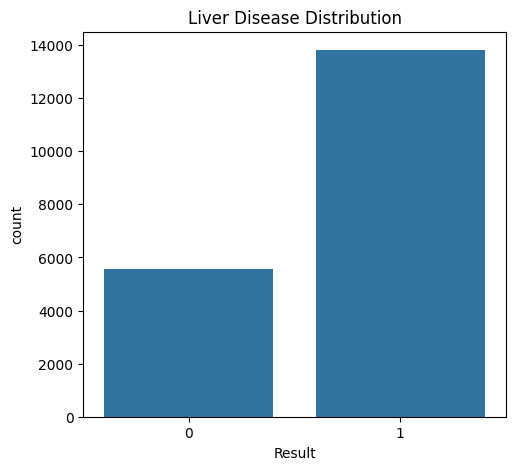

In [51]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Result', data=df)
plt.title('Liver Disease Distribution')

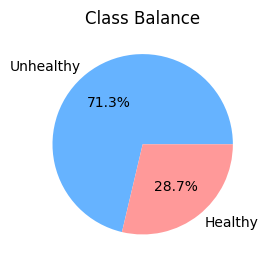

In [52]:
plt.subplot(1, 2, 2)
df['Result'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Unhealthy', 'Healthy'],
    colors=['#66b3ff', '#ff9999']
)
plt.ylabel('')
plt.title('Class Balance')
plt.show()

## Numerical Features Analysis

In [53]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Result')  

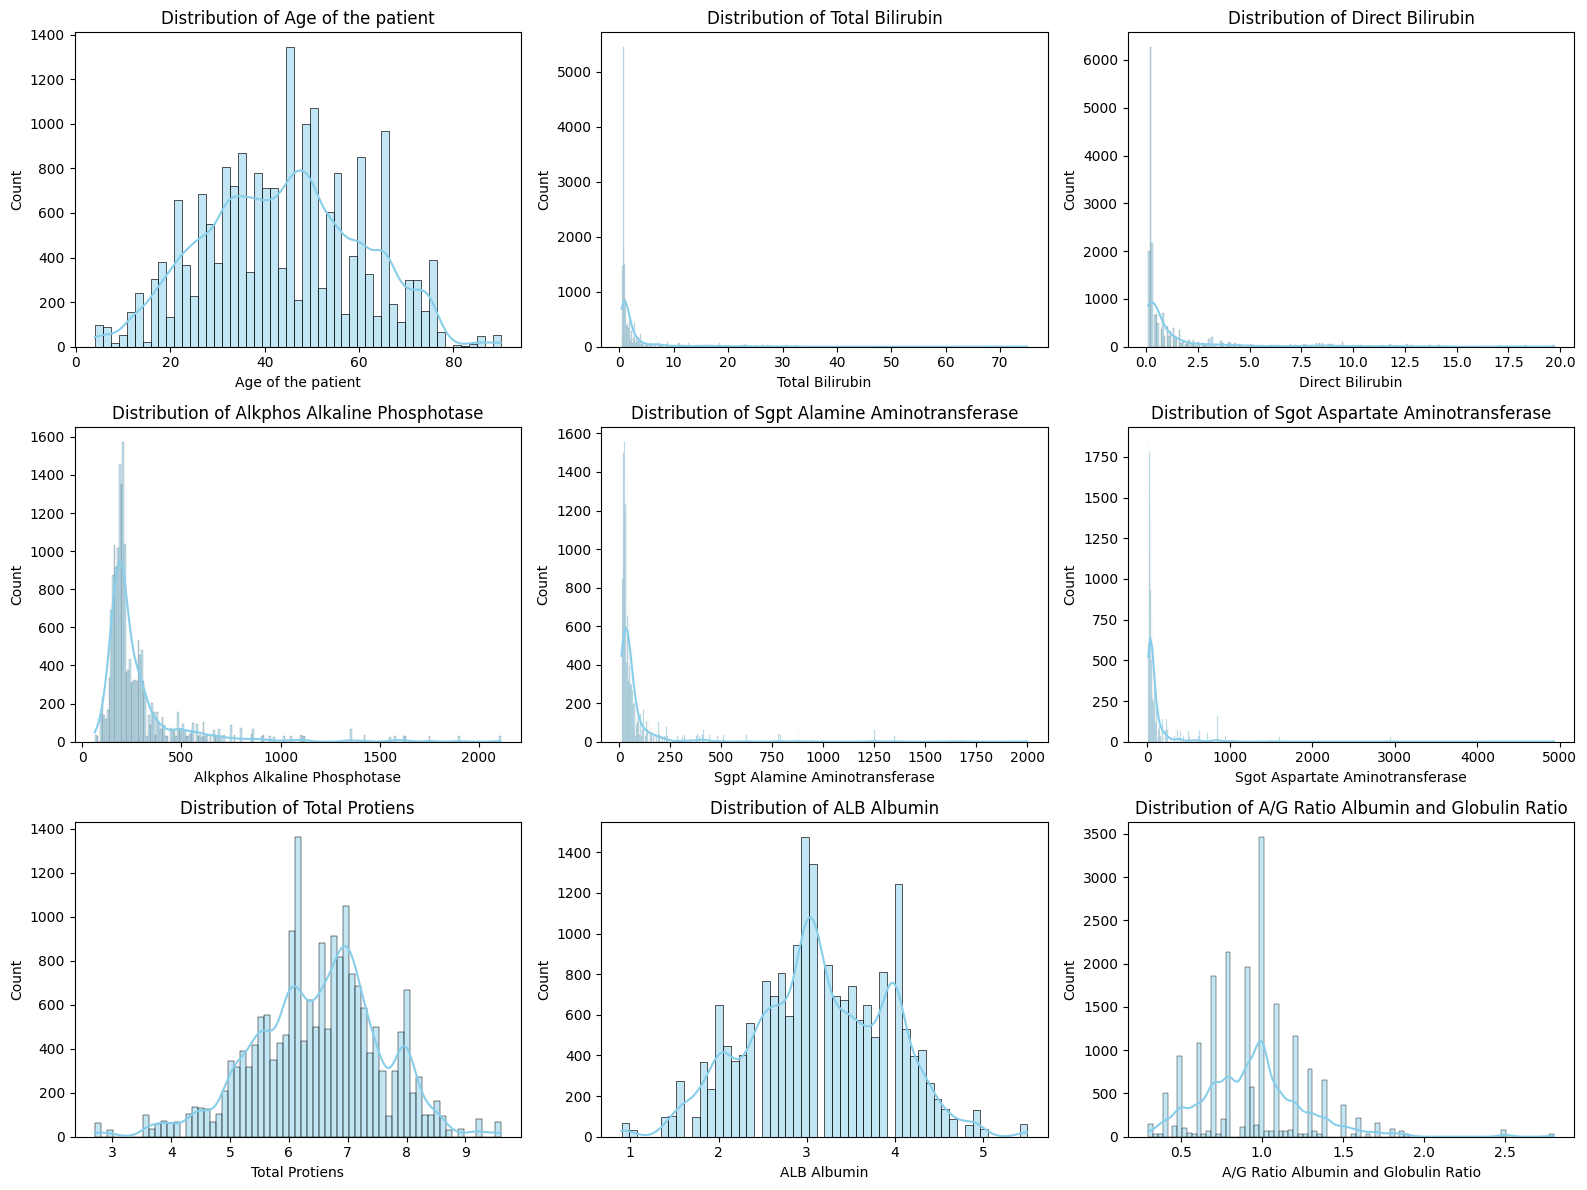

In [55]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols[:9], 1): 
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Outlier detection and capping

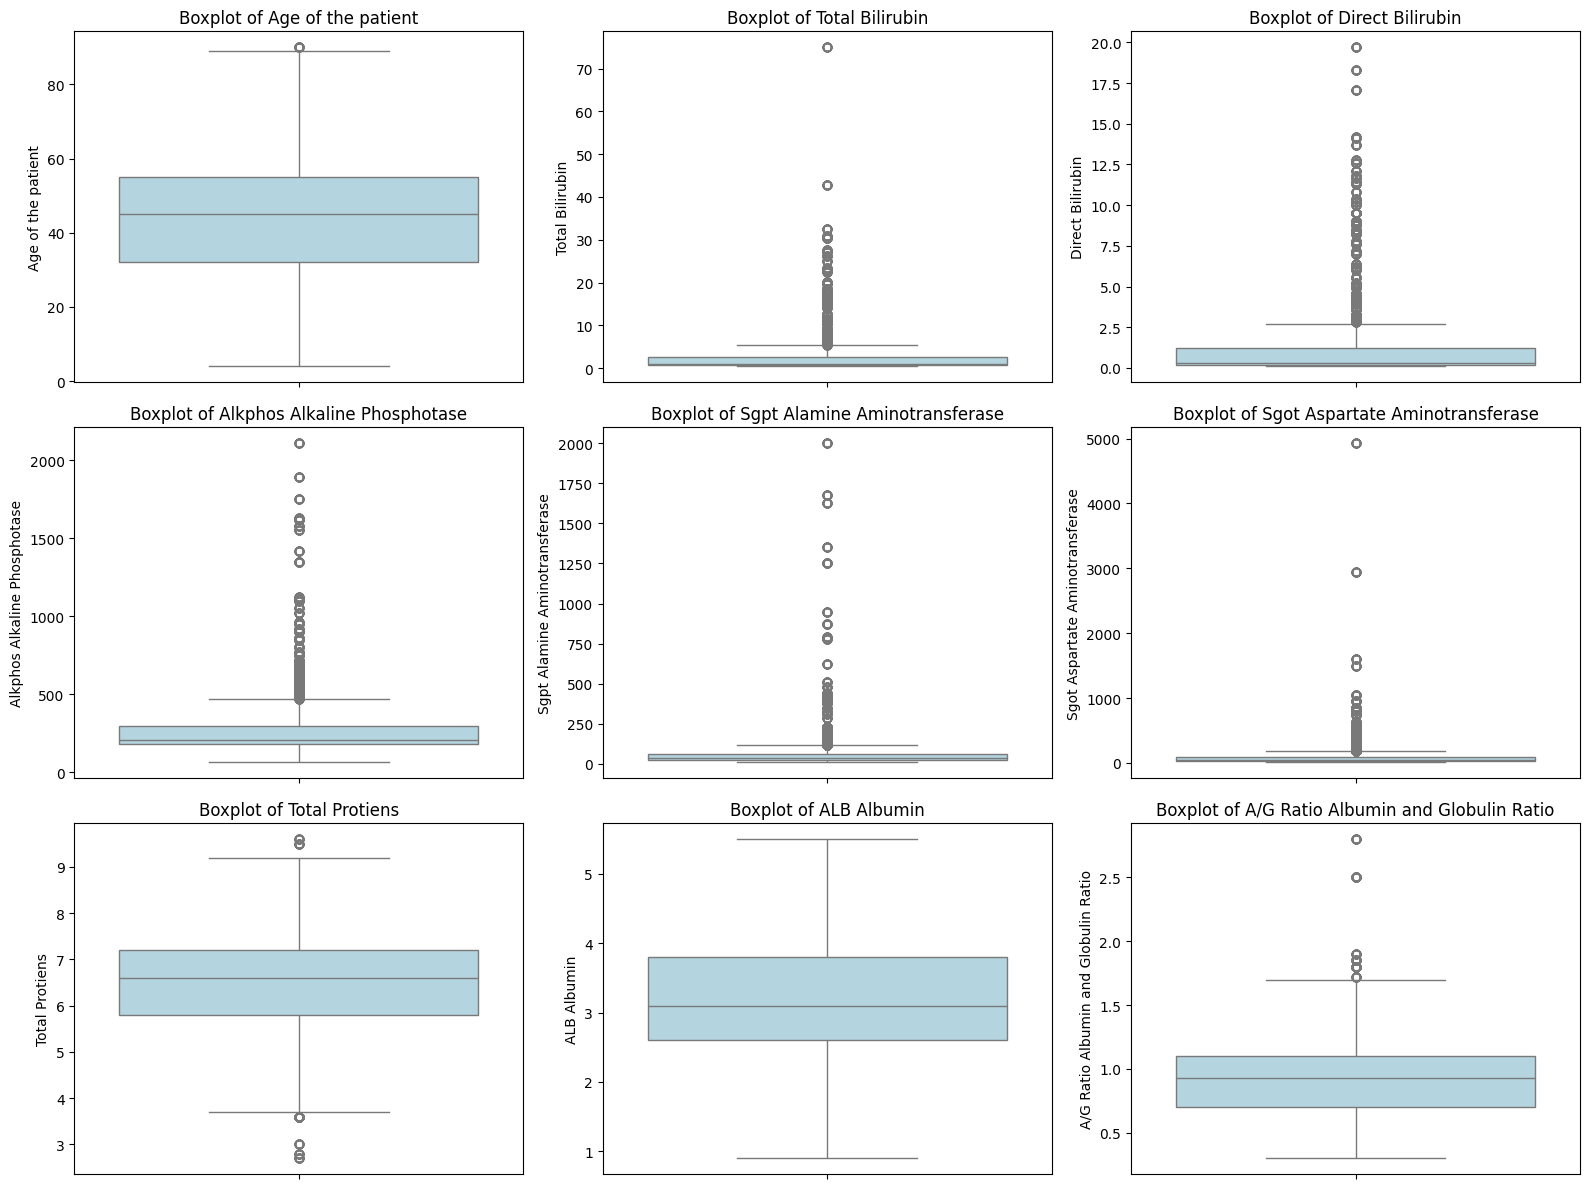

In [56]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Outlier Handling using IQR method

In [57]:
print("Before capping outliers:", len(df))
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Capped outliers in {col} using IQR method")
print("After removing outliers: ",len(df))

Before capping outliers: 19368
Capped outliers in Age of the patient using IQR method
Capped outliers in Total Bilirubin using IQR method
Capped outliers in Direct Bilirubin using IQR method
Capped outliers in Alkphos Alkaline Phosphotase using IQR method
Capped outliers in Sgpt Alamine Aminotransferase using IQR method
Capped outliers in Sgot Aspartate Aminotransferase using IQR method
Capped outliers in Total Protiens using IQR method
Capped outliers in ALB Albumin using IQR method
Capped outliers in A/G Ratio Albumin and Globulin Ratio using IQR method
Capped outliers in Gender using IQR method
After removing outliers:  19368


In [58]:
df.to_csv('../Datasets/preprocessed_liver_data.csv', index=False)
print("\nPreprocessed data saved to '../Datasets/preprocessed_liver_data.csv'")


Preprocessed data saved to '../Datasets/preprocessed_liver_data.csv'
